# Classify different data sets

### Basic includes

In [1]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras import optimizers
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Classify the Fashion Mnist

---

(60000, 28, 28)
(10000, 28, 28)


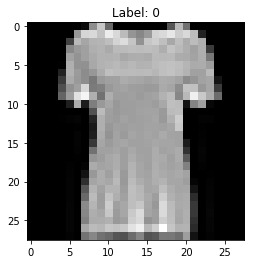

In [2]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)
print(fashion_test_data.shape)
test_index = 10
plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

## Standarizing images

standarizing data images and creating one hot labels

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [3]:
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))
fashion_train_data = fashion_train_data.astype('float32') / 255 

fashion_test_data = fashion_test_data.reshape((10000, 28 * 28)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

# one hot encoding
fashion_one_hot_labels = to_categorical(fashion_train_labels)
fashion_test_one_hot_labels = to_categorical(fashion_test_labels)

#creating validation set for first 10000 elements
fashion_validation_data = fashion_train_data[:10000]
fashion_validation_labels = fashion_one_hot_labels[:10000]

#creating input set
x_data = fashion_train_data[10000:]
y_data = fashion_one_hot_labels[10000:]
print(x_data.shape)
print(y_data.shape)

(50000, 784)
(50000, 10)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [4]:
#building keras model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=784))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(len(fashion_one_hot_labels[0]), activation='softmax'))
model.summary()

# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=4)
model.compile(loss='categorical_hinge', 
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_data, y_data,
          batch_size=512,
          epochs=40,
          validation_data=(fashion_validation_data, fashion_validation_labels),
          callbacks=[early_stop],
          verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
 - 2s - loss: 0.6291 - acc: 0.6657 - val_loss: 0.4280 - val_acc: 0.7825
Epoch 2/40
 - 2s - loss: 0.4106 - acc: 0.7980 - val_loss: 0.3610 - val_acc: 0.8192
Epoch 3/40
 - 1s - loss: 0.3633 - acc: 0.8208 - val_loss: 0.3200 - val_acc: 0.8383
Epoch 4/40
 - 2s - loss: 0.3384 - acc: 0.8318 - val_loss: 0.3055 - val_acc: 0.8456
Epoch 5/40
 - 1s - loss: 0.3211 - acc: 0.8400 - val_loss: 0.3114 - val_acc: 0.8444
Epoch 6/40
 - 2s - loss: 0.3102 - acc: 0.8457 - val_loss: 0.2901 - val_acc: 0.8546
Epoch 7/40
 - 1s - loss: 0.3003 - acc: 0.8495 - val_loss: 0.2853 - val_acc: 0.8565
Epoch 8/40
 - 2s - loss: 0.2950 - acc: 0.8525 - val_loss: 0.2885 - val_acc: 0.8556
Epoch 9/40
 - 2s - loss: 0.2883 - acc: 0.8558 - val_loss: 0.2675 - val_acc: 0.8660
Epoch 10/40
 - 2s - loss: 0.2850 - acc: 0.8579 - val_loss: 0.2670 - val_acc: 0.8665
Epoch 11/40
 - 2s - loss: 0.2795 - acc: 0.8604 - val_loss: 0.2687 - val_acc: 0.8645
Epoch 12/40
 - 1s - loss: 0.2736 - 

10000/10000 [==============================] - 0s 33us/step
[0.2633243887126446, 0.8671]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


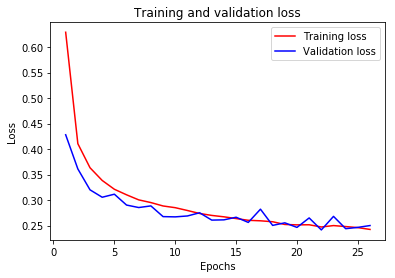

In [9]:
#evaluating the model with the test data
results = model.evaluate(fashion_test_data, fashion_test_one_hot_labels)
print(results)

history_dict = history.history
print(history_dict.keys())

#creating list variables for plotting validation
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)



#plotting validation and training loss

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

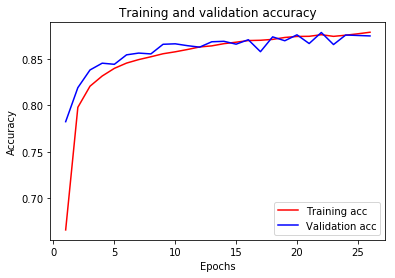

In [8]:
#plotting validation and train accuracy

plt.clf()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [3]:
(reuters_train_data, reuters_train_labels),(reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])
print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [4]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [5]:
tokenizer = Tokenizer(reuters_train_data.shape[0])
reuters_train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
reuters_test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')
print(reuters_train_data_token.shape)
print(reuters_test_data_token.shape)

# One-hot encoding the output
reuters_one_hot_train_labels = to_categorical(reuters_train_labels)
reuters_one_hot_test_labels = to_categorical(reuters_test_labels)
print(reuters_one_hot_train_labels.shape)
print(reuters_one_hot_test_labels.shape)

# Creating a validation set with the first 10000 reviews
reuters_validation_data = reuters_train_data_token[:3000]
reuters_validation_labels = reuters_one_hot_train_labels[:3000]
print(reuters_validation_data.shape)
print(reuters_validation_labels.shape)
# Creating the input set for the 
x_data = reuters_train_data_token[3000:]
y_data = reuters_one_hot_train_labels[3000:]
print("x:",x_data.shape)
print("y:",y_data.shape)

(8982, 8982)
(2246, 8982)
(8982, 46)
(2246, 46)
(3000, 8982)
(3000, 46)
x: (5982, 8982)
y: (5982, 46)


In [6]:
#building keras model
model1 = models.Sequential()
model1.add(layers.Dense(256, activation='relu', input_dim=len(reuters_train_data)))
model1.add(layers.Dropout(0.5))
# model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(len(reuters_one_hot_test_labels[0]), activation='softmax'))
model1.summary()

# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=8)
model1.compile(loss='categorical_hinge', 
              optimizer='adadelta',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2299648   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                11822     
Total params: 2,311,470
Trainable params: 2,311,470
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model1.fit(x_data, y_data,
          batch_size=256,
          epochs=50,
          validation_data=(reuters_validation_data, reuters_validation_labels),
          callbacks=[early_stop],
          verbose=2)

Train on 5982 samples, validate on 3000 samples
Epoch 1/50
 - 3s - loss: 1.0027 - acc: 0.3009 - val_loss: 0.9933 - val_acc: 0.4930
Epoch 2/50
 - 3s - loss: 0.8711 - acc: 0.4689 - val_loss: 0.7503 - val_acc: 0.5180
Epoch 3/50
 - 3s - loss: 0.6960 - acc: 0.5401 - val_loss: 0.6380 - val_acc: 0.5770
Epoch 4/50
 - 3s - loss: 0.5893 - acc: 0.5834 - val_loss: 0.5755 - val_acc: 0.6307
Epoch 5/50
 - 3s - loss: 0.5547 - acc: 0.6133 - val_loss: 0.5611 - val_acc: 0.6593
Epoch 6/50
 - 3s - loss: 0.5399 - acc: 0.6456 - val_loss: 0.5531 - val_acc: 0.6657
Epoch 7/50
 - 2s - loss: 0.5283 - acc: 0.6603 - val_loss: 0.5491 - val_acc: 0.6780
Epoch 8/50
 - 2s - loss: 0.5190 - acc: 0.6854 - val_loss: 0.5431 - val_acc: 0.6870
Epoch 9/50
 - 2s - loss: 0.5104 - acc: 0.6954 - val_loss: 0.5345 - val_acc: 0.6967
Epoch 10/50
 - 2s - loss: 0.4962 - acc: 0.7098 - val_loss: 0.5242 - val_acc: 0.6963
Epoch 11/50
 - 2s - loss: 0.4735 - acc: 0.7150 - val_loss: 0.5063 - val_acc: 0.6960
Epoch 12/50
 - 3s - loss: 0.4532 - ac

(2246,)
(2246, 46)
2246/2246 [==============================] - 0s 185us/step
[0.39702498440432527, 0.7800534283700843]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


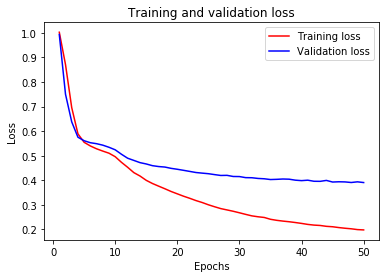

In [8]:
#evaluating the model with the test data
print(reuters_test_data.shape)
print(reuters_one_hot_test_labels.shape)
results = model1.evaluate(reuters_test_data_token, reuters_one_hot_test_labels)
print(results)

history_dict = history.history
print(history_dict.keys())

#creating list variables for plotting validation
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)



#plotting validation and training loss

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

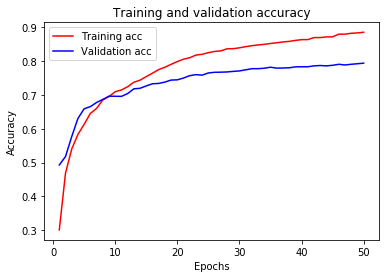

In [9]:
#plotting validation and train accuracy

plt.clf()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [2]:
student_data = pd.read_csv("student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

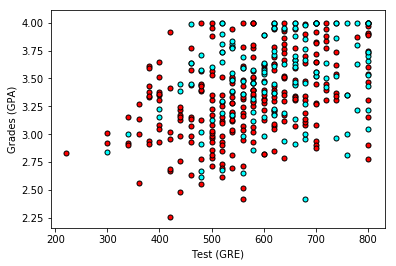

In [3]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

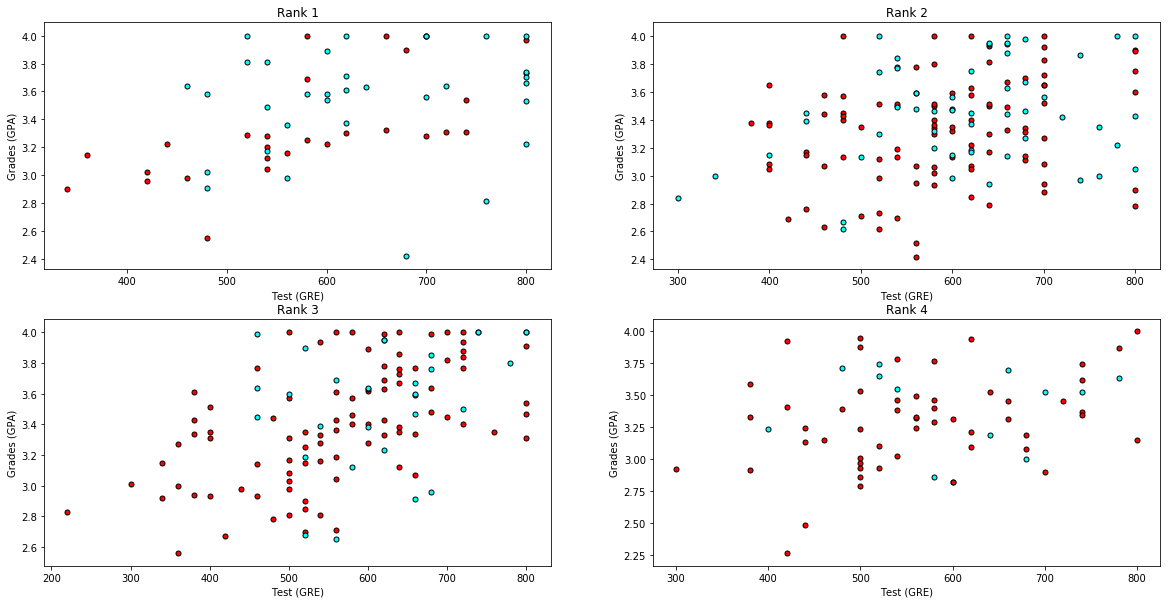

In [4]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [5]:
# admit    gre   gpa  rank
student_data.fillna(value= 0, inplace= True)
gpa = np.array(student_data["gpa"])
gpa = (gpa - np.nanmean(gpa))/np.nanstd(gpa)
gre = np.array(student_data["gre"])
gre = (gre - np.nanmean(gre))/np.nanstd(gre)
rank = np.array(student_data["rank"])
rank = to_categorical(rank)
standarizedStudentData = np.zeros((len(gre), 2))
standarizedStudentData[:,0] = gre
standarizedStudentData[:,1] = gpa
studentDataFinal = np.zeros((len(gre), 7))
for i, (studentData, cat) in enumerate(zip(standarizedStudentData, rank)):
    studentDataFinal[i] = np.concatenate((studentData, cat))
    
    
admit = np.array(student_data["admit"])
studentOneHotLabels = to_categorical(admit)

print(studentDataFinal.shape)
print(studentOneHotLabels.shape)

studentTrainData = studentDataFinal[:300]
studentTrainLabels = studentOneHotLabels[:300]
studentTestData = studentDataFinal[300:]
studentTestLabels = studentOneHotLabels[300:]

(400, 7)
(400, 2)


In [6]:
#building keras model
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_dim=7))
# model1.add(layers.Dropout(0.4))
model2.add(layers.Dense(32, activation='relu'))
# model1.add(layers.Dropout(0.3))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.summary()

# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=8)
model2.compile(loss='kullback_leibler_divergence', 
              optimizer='nadam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,378
Trainable params: 1,378
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model2.fit(studentTrainData, studentTrainLabels,
          batch_size=512,
          epochs=200,
          validation_split=0.2, 
          verbose=2)

Train on 240 samples, validate on 60 samples
Epoch 1/200
 - 0s - loss: 0.6918 - acc: 0.3958 - val_loss: 0.6550 - val_acc: 0.5833
Epoch 2/200
 - 0s - loss: 0.6635 - acc: 0.4917 - val_loss: 0.6377 - val_acc: 0.6333
Epoch 3/200
 - 0s - loss: 0.6432 - acc: 0.5625 - val_loss: 0.6217 - val_acc: 0.6667
Epoch 4/200
 - 0s - loss: 0.6244 - acc: 0.6208 - val_loss: 0.6058 - val_acc: 0.7167
Epoch 5/200
 - 0s - loss: 0.6059 - acc: 0.6542 - val_loss: 0.5900 - val_acc: 0.7000
Epoch 6/200
 - 0s - loss: 0.5873 - acc: 0.6792 - val_loss: 0.5739 - val_acc: 0.6500
Epoch 7/200
 - 0s - loss: 0.5686 - acc: 0.7000 - val_loss: 0.5575 - val_acc: 0.6500
Epoch 8/200
 - 0s - loss: 0.5497 - acc: 0.7000 - val_loss: 0.5408 - val_acc: 0.6500
Epoch 9/200
 - 0s - loss: 0.5303 - acc: 0.7000 - val_loss: 0.5239 - val_acc: 0.6500
Epoch 10/200
 - 0s - loss: 0.5107 - acc: 0.7000 - val_loss: 0.5068 - val_acc: 0.6333
Epoch 11/200
 - 0s - loss: 0.4910 - acc: 0.7083 - val_loss: 0.4888 - val_acc: 0.6333
Epoch 12/200
 - 0s - loss: 0.

Epoch 97/200
 - 0s - loss: 0.0052 - acc: 0.7083 - val_loss: 0.0068 - val_acc: 0.6333
Epoch 98/200
 - 0s - loss: 0.0050 - acc: 0.7083 - val_loss: 0.0067 - val_acc: 0.6333
Epoch 99/200
 - 0s - loss: 0.0049 - acc: 0.7083 - val_loss: 0.0065 - val_acc: 0.6333
Epoch 100/200
 - 0s - loss: 0.0048 - acc: 0.7083 - val_loss: 0.0064 - val_acc: 0.6333
Epoch 101/200
 - 0s - loss: 0.0047 - acc: 0.7083 - val_loss: 0.0062 - val_acc: 0.6333
Epoch 102/200
 - 0s - loss: 0.0046 - acc: 0.7083 - val_loss: 0.0061 - val_acc: 0.6333
Epoch 103/200
 - 0s - loss: 0.0044 - acc: 0.7083 - val_loss: 0.0059 - val_acc: 0.6333
Epoch 104/200
 - 0s - loss: 0.0043 - acc: 0.7083 - val_loss: 0.0058 - val_acc: 0.6333
Epoch 105/200
 - 0s - loss: 0.0042 - acc: 0.7083 - val_loss: 0.0057 - val_acc: 0.6333
Epoch 106/200
 - 0s - loss: 0.0041 - acc: 0.7083 - val_loss: 0.0055 - val_acc: 0.6333
Epoch 107/200
 - 0s - loss: 0.0041 - acc: 0.7083 - val_loss: 0.0054 - val_acc: 0.6333
Epoch 108/200
 - 0s - loss: 0.0040 - acc: 0.7083 - val_lo

Epoch 193/200
 - 0s - loss: 0.0011 - acc: 0.7083 - val_loss: 0.0015 - val_acc: 0.6333
Epoch 194/200
 - 0s - loss: 0.0010 - acc: 0.7083 - val_loss: 0.0015 - val_acc: 0.6333
Epoch 195/200
 - 0s - loss: 0.0010 - acc: 0.7083 - val_loss: 0.0014 - val_acc: 0.6333
Epoch 196/200
 - 0s - loss: 0.0010 - acc: 0.7083 - val_loss: 0.0014 - val_acc: 0.6333
Epoch 197/200
 - 0s - loss: 0.0010 - acc: 0.7083 - val_loss: 0.0014 - val_acc: 0.6333
Epoch 198/200
 - 0s - loss: 0.0010 - acc: 0.7083 - val_loss: 0.0014 - val_acc: 0.6333
Epoch 199/200
 - 0s - loss: 9.9298e-04 - acc: 0.7083 - val_loss: 0.0014 - val_acc: 0.6333
Epoch 200/200
 - 0s - loss: 9.8224e-04 - acc: 0.7083 - val_loss: 0.0014 - val_acc: 0.6333


(100, 7)
(100, 2)
100/100 [==============================] - 0s 41us/step
[0.0012386897555552424, 0.65]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


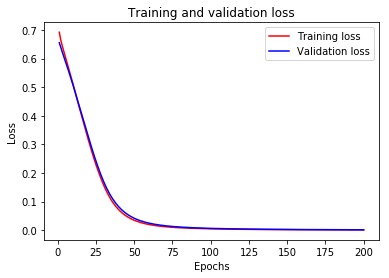

In [8]:
#evaluating the model with the test data
print(studentTestData.shape)
print(studentTestLabels.shape)
results = model2.evaluate(studentTestData, studentTestLabels)
print(results)

history_dict = history.history
print(history_dict.keys())

#creating list variables for plotting validation
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)



#plotting validation and training loss

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

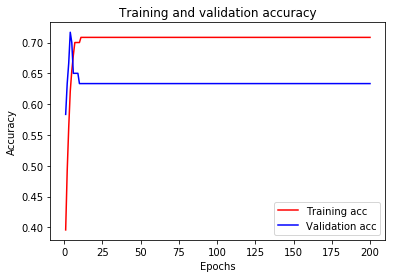

In [9]:
#plotting validation and train accuracy

plt.clf()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set